In [3]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('/content/WPI_Steel_jan2022_to_may2026.xlsx')



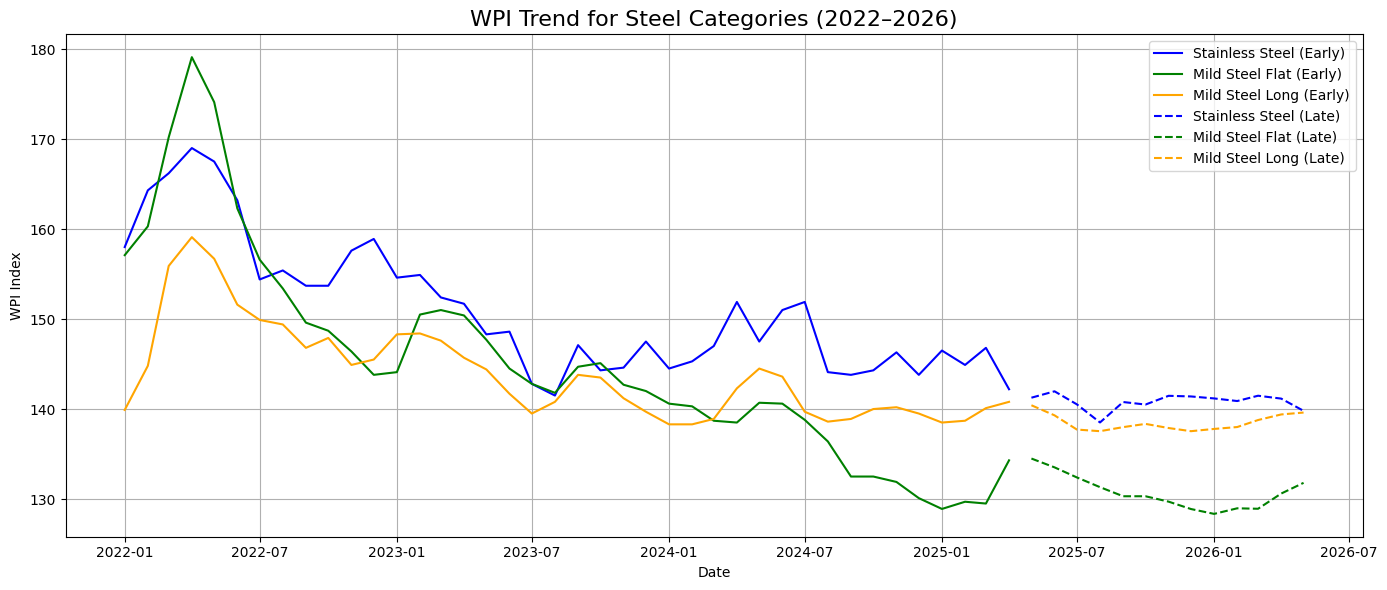

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read Excel
df = pd.read_excel('/content/WPI_Steel_jan2022_to_may2026.xlsx')

# Step 2: Convert 'Date' to datetime using custom format (e.g., 'Jan-22')
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Step 3: Filter full, early, and late periods
df_full = df[(df['Date'] >= '2022-01-01') & (df['Date'] <= '2026-05-31')]
df_early = df_full[df_full['Date'] <= '2025-04-30']
df_late = df_full[df_full['Date'] >= '2025-05-01']

# Step 4: Plotting
plt.figure(figsize=(14, 6))

# Early period (solid)
plt.plot(df_early['Date'], df_early['WPI (stainless)'], label='Stainless Steel (Early)', color='blue')
plt.plot(df_early['Date'], df_early['WPI (mild flat)'], label='Mild Steel Flat (Early)', color='green')
plt.plot(df_early['Date'], df_early['WPI (mild long)'], label='Mild Steel Long (Early)', color='orange')

# Late period (dashed)
plt.plot(df_late['Date'], df_late['WPI (stainless)'], label='Stainless Steel (Late)', color='blue', linestyle='--')
plt.plot(df_late['Date'], df_late['WPI (mild flat)'], label='Mild Steel Flat (Late)', color='green', linestyle='--')
plt.plot(df_late['Date'], df_late['WPI (mild long)'], label='Mild Steel Long (Late)', color='orange', linestyle='--')

# Decorations
plt.title('WPI Trend for Steel Categories (2022–2026)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('WPI Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


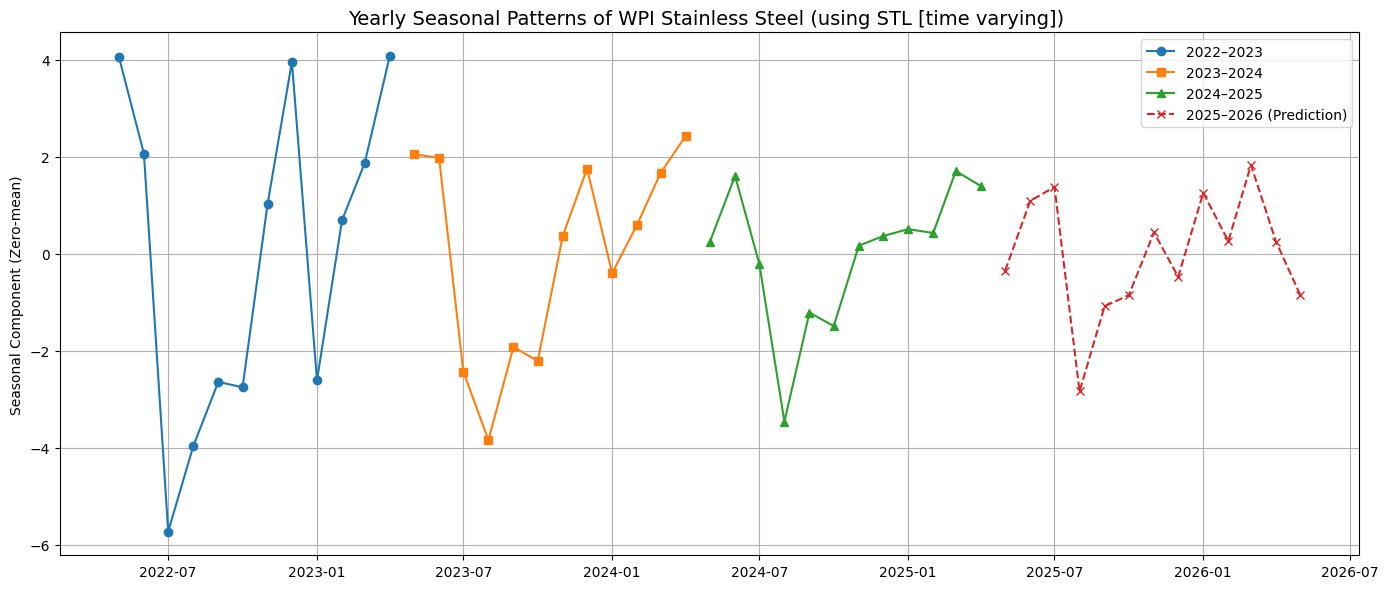

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


# Focus on stainless steel WPI
steel = df['WPI (stainless)']

# Perform STL decomposition on full range
stl = STL(steel, period=12)
res = stl.fit()

# Get seasonal component
seasonal = res.seasonal

# Extract seasonal pattern for each year
season_22_23 = seasonal['2022-05-01':'2023-04-01']
season_23_24 = seasonal['2023-05-01':'2024-04-01']
season_24_25 = seasonal['2024-05-01':'2025-04-01']
season_25_26 = seasonal['2025-05-01':'2026-05-01']

# Normalize each pattern to zero mean (for shape comparison)
season_22_23 -= season_22_23.mean()
season_23_24 -= season_23_24.mean()
season_24_25 -= season_24_25.mean()
season_25_26 -= season_25_26.mean()

# Plot all seasonal years
plt.figure(figsize=(14, 6))
plt.plot(season_22_23.index, season_22_23.values, label='2022–2023', marker='o')
plt.plot(season_23_24.index, season_23_24.values, label='2023–2024', marker='s')
plt.plot(season_24_25.index, season_24_25.values, label='2024–2025', marker='^')
plt.plot(season_25_26.index, season_25_26.values, label='2025–2026 (Prediction)', marker='x', linestyle='--')

plt.title('Yearly Seasonal Patterns of WPI Stainless Steel (using STL [time varying]) ', fontsize=14)
plt.ylabel('Seasonal Component (Zero-mean)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

season_25_26 = seasonal['2025-05-01':'2026-04-01']


def compare_seasonality(reference, target, ref_label, target_label="2025–2026"):
    # Convert to arrays
    y_true = reference.values
    y_pred = target.values

    # Correlation
    corr = np.corrcoef(y_true, y_pred)[0, 1]

    # MSE and Normalized MSE
    mse = mean_squared_error(y_true, y_pred)
    nmse = mse / np.var(y_true)

    print(f"📊 Comparing {target_label} to {ref_label}:")
    print(f"   🔁 Correlation       = {corr:.3f}")
    print(f"   📉 MSE               = {mse:.3f}")
    print(f"   ⚖️ Normalized MSE    = {nmse:.3f}")
    print("-" * 50)

# Run comparisons
compare_seasonality(season_22_23, season_25_26, "2022–2023")
compare_seasonality(season_23_24, season_25_26, "2023–2024")
compare_seasonality(season_24_25, season_25_26, "2024–2025")


📊 Comparing 2025–2026 to 2022–2023:
   🔁 Correlation       = 0.191
   📉 MSE               = 10.665
   ⚖️ Normalized MSE    = 1.000
--------------------------------------------------
📊 Comparing 2025–2026 to 2023–2024:
   🔁 Correlation       = 0.513
   📉 MSE               = 3.099
   ⚖️ Normalized MSE    = 0.747
--------------------------------------------------
📊 Comparing 2025–2026 to 2024–2025:
   🔁 Correlation       = 0.851
   📉 MSE               = 0.554
   ⚖️ Normalized MSE    = 0.279
--------------------------------------------------


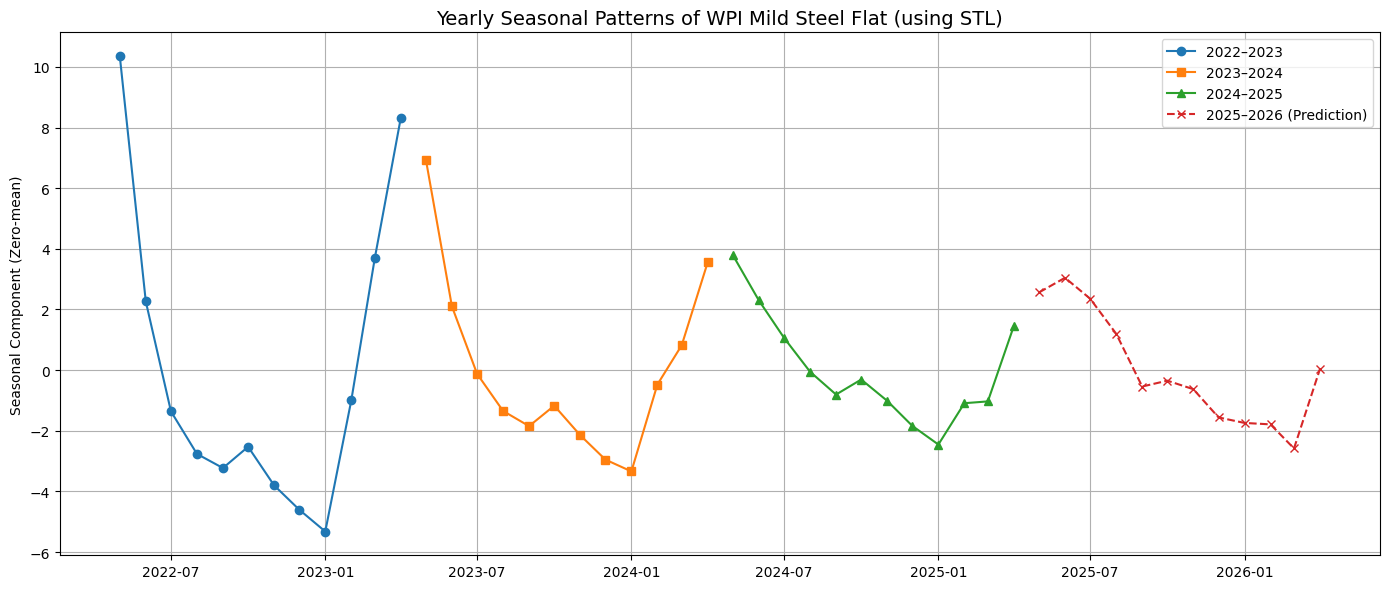

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Focus on WPI (mild flat)
mild_flat = df['WPI (mild flat)']

# Perform STL decomposition on full range
stl_flat = STL(mild_flat, period=12)
res_flat = stl_flat.fit()

# Get seasonal component
seasonal_flat = res_flat.seasonal

# Extract seasonal pattern for each year
season_flat_22_23 = seasonal_flat['2022-05-01':'2023-04-01']
season_flat_23_24 = seasonal_flat['2023-05-01':'2024-04-01']
season_flat_24_25 = seasonal_flat['2024-05-01':'2025-04-01']
season_flat_25_26 = seasonal_flat['2025-05-01':'2026-04-01']  # Ensure 12 months only

# Normalize to zero mean (for comparing shapes)
season_flat_22_23 -= season_flat_22_23.mean()
season_flat_23_24 -= season_flat_23_24.mean()
season_flat_24_25 -= season_flat_24_25.mean()
season_flat_25_26 -= season_flat_25_26.mean()

# Plot seasonal components
plt.figure(figsize=(14, 6))
plt.plot(season_flat_22_23.index, season_flat_22_23.values, label='2022–2023', marker='o')
plt.plot(season_flat_23_24.index, season_flat_23_24.values, label='2023–2024', marker='s')
plt.plot(season_flat_24_25.index, season_flat_24_25.values, label='2024–2025', marker='^')
plt.plot(season_flat_25_26.index, season_flat_25_26.values, label='2025–2026 (Prediction)', marker='x', linestyle='--')

plt.title('Yearly Seasonal Patterns of WPI Mild Steel Flat (using STL)', fontsize=14)
plt.ylabel('Seasonal Component (Zero-mean)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


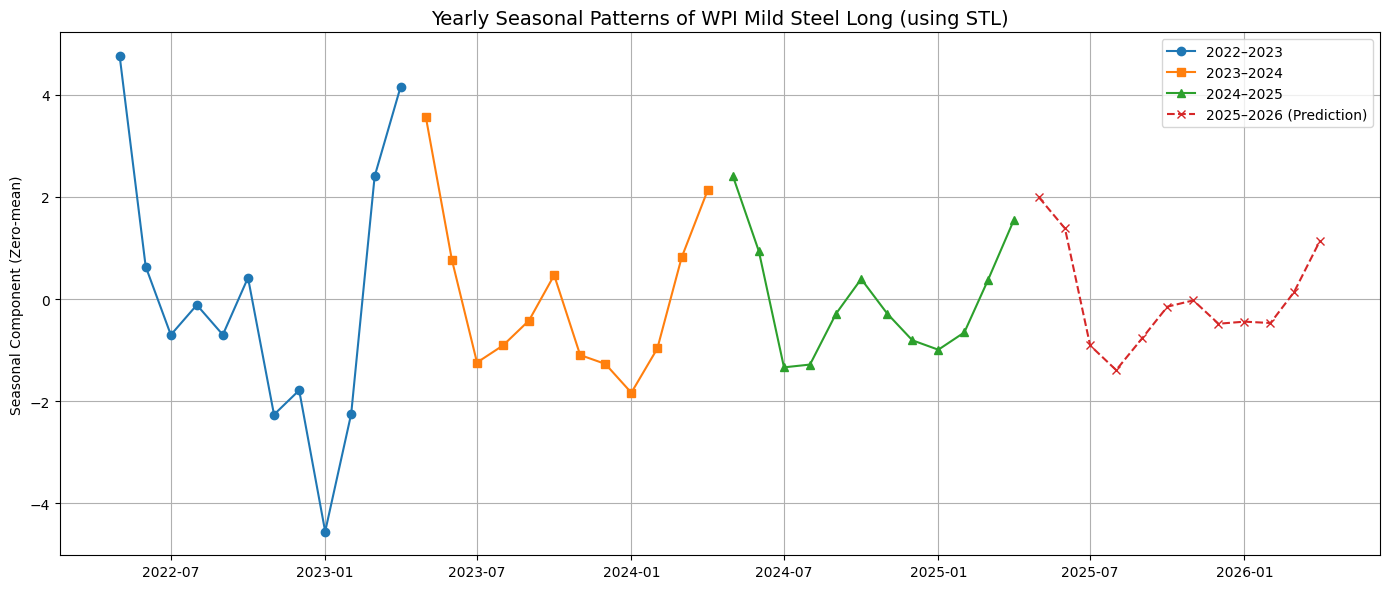

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Focus on WPI (mild long)
mild_long = df['WPI (mild long)']

# Perform STL decomposition on full range
stl_long = STL(mild_long, period=12)
res_long = stl_long.fit()

# Get seasonal component
seasonal_long = res_long.seasonal

# Extract seasonal pattern for each year
season_long_22_23 = seasonal_long['2022-05-01':'2023-04-01']
season_long_23_24 = seasonal_long['2023-05-01':'2024-04-01']
season_long_24_25 = seasonal_long['2024-05-01':'2025-04-01']
season_long_25_26 = seasonal_long['2025-05-01':'2026-04-01']  # 12 months only

# Normalize to zero mean (for shape comparison)
season_long_22_23 -= season_long_22_23.mean()
season_long_23_24 -= season_long_23_24.mean()
season_long_24_25 -= season_long_24_25.mean()
season_long_25_26 -= season_long_25_26.mean()

# Plot seasonal components
plt.figure(figsize=(14, 6))
plt.plot(season_long_22_23.index, season_long_22_23.values, label='2022–2023', marker='o')
plt.plot(season_long_23_24.index, season_long_23_24.values, label='2023–2024', marker='s')
plt.plot(season_long_24_25.index, season_long_24_25.values, label='2024–2025', marker='^')
plt.plot(season_long_25_26.index, season_long_25_26.values, label='2025–2026 (Prediction)', marker='x', linestyle='--')

plt.title('Yearly Seasonal Patterns of WPI Mild Steel Long (using STL)', fontsize=14)
plt.ylabel('Seasonal Component (Zero-mean)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
from IPython.display import display

# Filter prediction period
prediction_range = df.loc['2025-05-01':'2026-05-01', ['WPI (stainless)', 'WPI (mild flat)', 'WPI (mild long)']]

# Display nicely
print("📈 WPI Predictions from May 2025 to May 2026:")
display(prediction_range.round(2))


📈 WPI Predictions from May 2025 to May 2026:


,WPI (stainless),WPI (mild flat),WPI (mild long)
Date,,,
2025-05-01,141.26,134.50,140.42
2025-06-01,141.97,133.52,139.30
2025-07-01,140.52,132.40,137.72
2025-08-01,138.51,131.32,137.54
2025-09-01,140.78,130.31,137.99
2025-10-01,140.50,130.31,138.35
2025-11-01,141.47,129.71,137.89
2025-12-01,141.40,128.89,137.54
2026-01-01,141.18,128.35,137.79


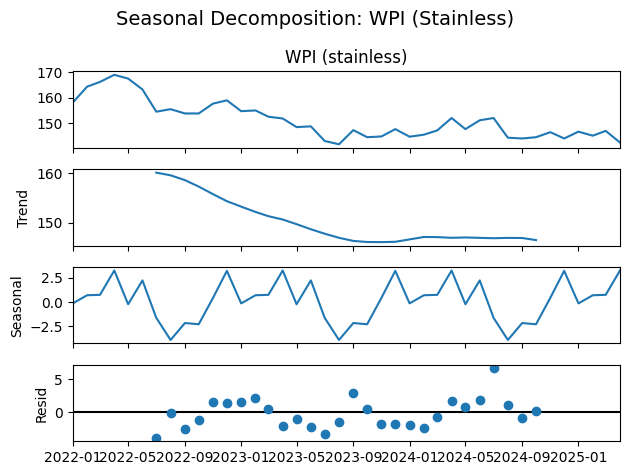

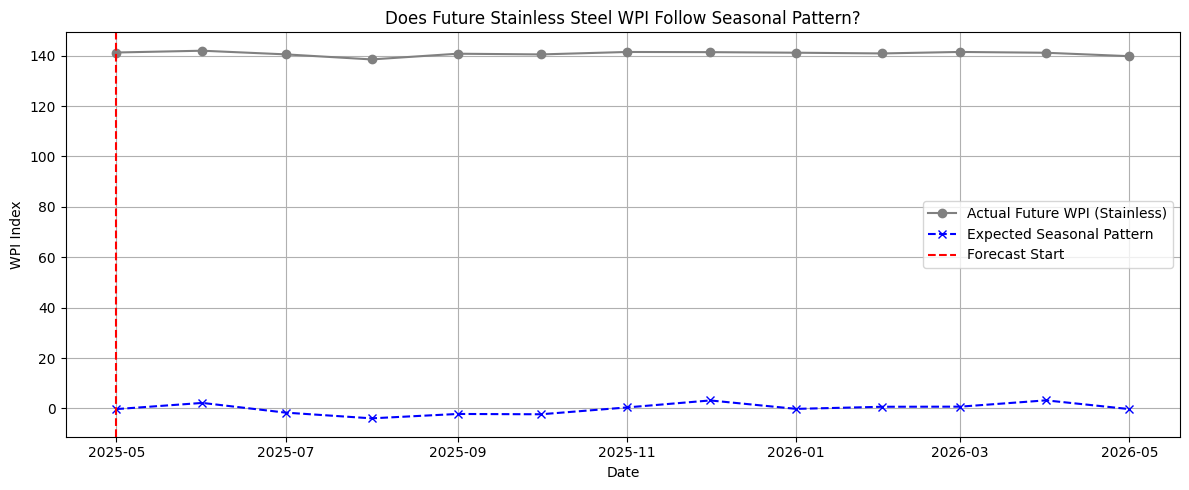

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load if needed (uncomment only if df is not already loaded)
# df = pd.read_excel('/content/WPI_Steel_jan2022_to_may2026.xlsx')
# df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
# df.set_index('Date', inplace=True)

# Step 2: Split stainless steel series
steel = df['WPI (stainless)']
steel_train = steel[:'2025-04-30']   # up to April 2025
steel_future = steel['2025-05-01':]  # May 2025 onward

# Step 3: Decomposition with 12-month seasonal window
result = seasonal_decompose(steel_train, model='additive', period=12)

# Step 4: Plot full decomposition
result.plot()
plt.suptitle('Seasonal Decomposition: WPI (Stainless)', fontsize=14)
plt.tight_layout()
plt.show()

# Step 5: Compare extracted seasonal pattern with future values
# Extract seasonal component for visual alignment
seasonal_pattern = result.seasonal[-12:]  # last full year of seasonality

# Create repeated seasonal pattern for future
import numpy as np
future_seasonal = np.tile(seasonal_pattern.values, int(np.ceil(len(steel_future)/12)))[:len(steel_future)]
future_seasonal_index = steel_future.index

# Plotting future actual vs seasonal pattern
plt.figure(figsize=(12, 5))
plt.plot(future_seasonal_index, steel_future.values, label='Actual Future WPI (Stainless)', color='gray', marker='o')
plt.plot(future_seasonal_index, future_seasonal, label='Expected Seasonal Pattern', color='blue', linestyle='--', marker='x')
plt.axvline(pd.to_datetime('2025-05-01'), color='red', linestyle='--', label='Forecast Start')
plt.title('Does Future Stainless Steel WPI Follow Seasonal Pattern?')
plt.xlabel('Date')
plt.ylabel('WPI Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


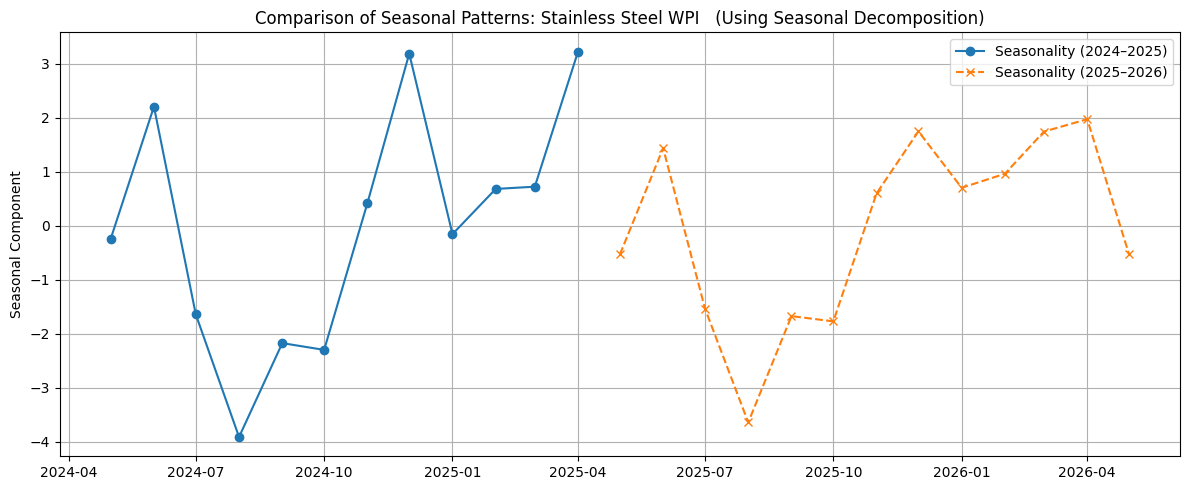

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Focus on WPI (stainless)
steel = df['WPI (stainless)']
steel_early = steel[:'2025-04-30']
steel_late = steel['2025-05-01':]

# Decompose early period (safe: >24 months)
decomp_early = seasonal_decompose(steel_early, model='additive', period=12)

# Decompose full data (so late period gets enough length to stabilize seasonality)
decomp_full = seasonal_decompose(steel, model='additive', period=12)

# Extract seasonal components
season_early = decomp_early.seasonal
season_full = decomp_full.seasonal

# Align both seasonality patterns: focus on months May–April (13 months)
season_early_subset = season_early['2024-05-01':'2025-04-01']
season_late_subset = season_full['2025-05-01':'2026-05-01']

# Plot comparison
plt.figure(figsize=(12, 5))
plt.plot(season_early_subset.index, season_early_subset.values, label='Seasonality (2024–2025)', marker='o')
plt.plot(season_late_subset.index, season_late_subset.values, label='Seasonality (2025–2026)', marker='x', linestyle='--')
plt.title('Comparison of Seasonal Patterns: Stainless Steel WPI   (Using Seasonal Decomposition)')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
